In [49]:
import pandas as pd
output=pd.read_csv('2018.csv')


In [34]:
pd.DataFrame(output)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357
...,...,...,...,...,...,...,...,...,...
151,152,Yemen,3.355,0.442,1.073,0.343,0.244,0.083,0.064
152,153,Tanzania,3.303,0.455,0.991,0.381,0.481,0.270,0.097
153,154,South Sudan,3.254,0.337,0.608,0.177,0.112,0.224,0.106
154,155,Central African Republic,3.083,0.024,0.000,0.010,0.305,0.218,0.038


<h2> Перший приклад <h2>

In [50]:
df=pd.DataFrame(output)
df1=df[["GDP per capita","Healthy life expectancy"]]
df1

,GDP per capita,Healthy life expectancy
0,1.305,0.874
1,1.456,0.861
2,1.351,0.868
3,1.343,0.914
4,1.420,0.927
...,...,...
151,0.442,0.343
152,0.455,0.381
153,0.337,0.177
154,0.024,0.010


In [40]:
df1

,GDP per capita,Healthy life expectancy
0,1.305,0.874
1,1.456,0.861
2,1.351,0.868
3,1.343,0.914
4,1.420,0.927
...,...,...
151,0.442,0.343
152,0.455,0.381
153,0.337,0.177
154,0.024,0.010


In [54]:
#data normalization
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
df1.iloc[:,0:2]=scaler.fit_transform(df1.iloc[:,0:2])

C:\Users\user\AppData\Local\Temp\ipykernel_6876\873189750.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.iloc[:,0:2]=scaler.fit_transform(df1.iloc[:,0:2])


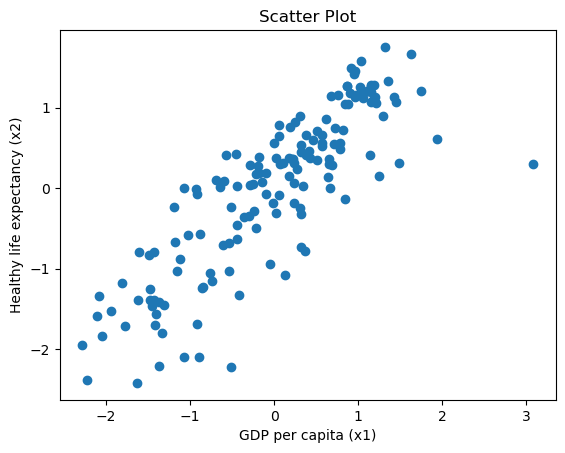

In [33]:
import matplotlib.pyplot as plt
# Create an interactive scatter plot 
fig = plt.scatter(df1[["GDP per capita"]], df1[["Healthy life expectancy"]])
plt.xlabel("GDP per capita (x1)")
plt.ylabel("Healthy life expectancy (x2)")
plt.title('Scatter Plot')
fig

In [36]:
import numpy as np
# Find Covariance
covraiance_matrix= np.cov([df1.iloc[:,0],df1.iloc[:,1]])
covraiance_matrix

array([[1.00645161, 0.84972015],
       [0.84972015, 1.00645161]])

In [37]:
# Find Eigen Values & Eigen Vectors
eigen_values, eigen_vectors=np.linalg.eig(covraiance_matrix)

In [38]:
eigen_values

array([1.85617176, 0.15673146])

In [39]:
eigen_vectors

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [95]:
# Select No. of Principle Components
pc1= eigen_vectors[0]
pc2= eigen_vectors[1]

In [96]:
pc1

array([ 0.70710678, -0.70710678])

In [97]:
pc2

array([0.70710678, 0.70710678])

In [100]:
# Transform Data 2D to 1D
transformed_data1= np.dot(df1.iloc[:,0:2],pc1.T)
transformed_data2= np.dot(df1.iloc[:,0:2],pc2.T)
new_df = pd.DataFrame({'PC1': transformed_data1, 'PC2': transformed_data2})
new_df

,PC1,PC2
0,-0.044157,1.541228
1,0.266404,1.777292
2,0.056295,1.607297
3,-0.089988,1.724620
4,0.012135,1.901240
...,...,...
151,-0.084736,-1.542285
152,-0.170086,-1.409874
153,0.200850,-2.207975
154,0.112817,-3.253013


In [55]:
#application PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
XPCAreduced = pca.fit_transform(df1)
pd.DataFrame(XPCAreduced)


,0,1
0,-1.541228,-0.044157
1,-1.777292,0.266404
2,-1.607297,0.056295
3,-1.724620,-0.089988
4,-1.901240,0.012135
...,...,...
151,1.542285,-0.084736
152,1.409874,-0.170086
153,2.207975,0.200850
154,3.253013,0.112817


In [56]:
pca.explained_variance_

array([1.85617176, 0.15673146])

In [57]:
pca.components_

array([[-0.70710678, -0.70710678],
       [ 0.70710678, -0.70710678]])

<h2> Другий приклад <h2>

In [97]:
df2=df[["GDP per capita","Social support","Healthy life expectancy","Freedom to make life choices"]]
df2

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,1.305,1.592,0.874,0.681
1,1.456,1.582,0.861,0.686
2,1.351,1.590,0.868,0.683
3,1.343,1.644,0.914,0.677
4,1.420,1.549,0.927,0.660
...,...,...,...,...
151,0.442,1.073,0.343,0.244
152,0.455,0.991,0.381,0.481
153,0.337,0.608,0.177,0.112
154,0.024,0.000,0.010,0.305


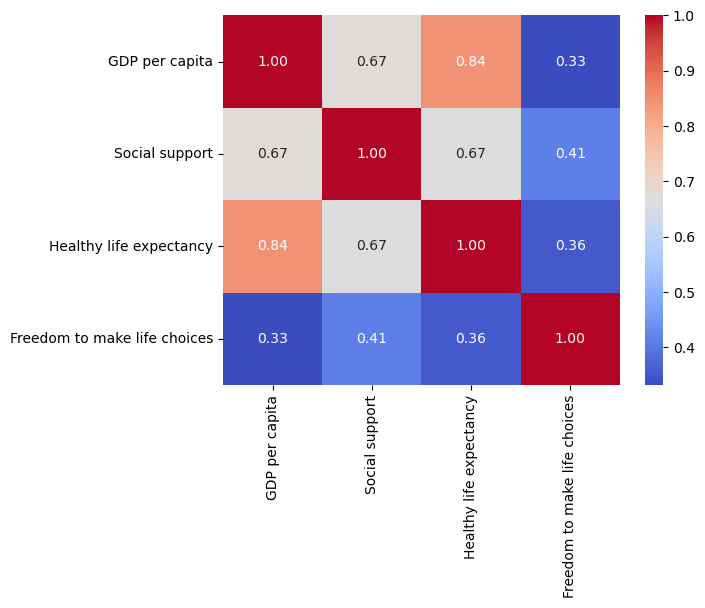

In [77]:
correlation_matrix = df2.corr()
import seaborn as sns
import matplotlib.pyplot as plt
# Створення теплової карти
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [85]:
#data normalization
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
df2.iloc[:,[0,1,2,3]]=scaler.fit_transform(df2.iloc[:,[0,1,2,3]])

C:\Users\user\AppData\Local\Temp\ipykernel_6876\348262974.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.iloc[:,[0,1,2,3]]=scaler.fit_transform(df2.iloc[:,[0,1,2,3]])


In [95]:
#application PCA
pca1 = PCA(n_components = 4)
XPCAreduced = pca1.fit_transform(df2)
df3=pd.DataFrame(XPCAreduced)
df3

,0,1,2,3
0,-2.343907,0.643829,-0.066997,-0.026632
1,-2.520891,0.573273,0.073967,0.286508
2,-2.396096,0.627079,-0.029510,0.074575
3,-2.567976,0.544960,-0.127588,-0.076193
4,-2.504741,0.386776,0.206281,0.031079
...,...,...,...,...
151,1.898313,-0.574573,-0.587591,-0.117677
152,1.424566,0.729972,-0.027262,-0.155373
153,3.505139,-1.021499,0.249645,0.177346
154,4.951685,0.549601,1.674122,0.163845


In [88]:
pca1.components_

array([[-0.54983213, -0.52019947, -0.55204595, -0.3497462 ],
       [-0.2940947 , -0.03168287, -0.25964056,  0.91928847],
       [ 0.32699349, -0.85314564,  0.36524453,  0.17836539],
       [ 0.71011843, -0.02304838, -0.70315609,  0.02778669]])

In [89]:
pca1.explained_variance_

array([2.71227696, 0.78415964, 0.37317612, 0.15619373])

In [96]:
pca1.explained_variance_ratio_


array([0.67372264, 0.19478324, 0.09269599, 0.03879812])